# SD-TSIA 211 :  Lab 2 Séparateurs à Vaste Marge

## Julie Keisler - Aurore Gosmant

In [5]:
import numpy as np

## Part I - Data

In [6]:
def load_breastcancer(filename):
    """
    This function reads a file, for instance : 
    filename = 'wdbc_M1_B0.data'
    It returns : 
    X : matrix of caracteristics
    y : a vector of classes such as :
        y[i] = 1, la tumeur est maligne, and if
        y[i] = -1, la tumeur est benigne

    For more information on the database : 
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # the column 0 doesn't interest us here
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation of the matrix
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [7]:
X,Y = load_breastcancer('wdbcM1B0.data')

## Part II - Subgradient method

### Question 2.1

Let's solve the following problem : 
$$
\min_{v \in \mathbb{R}^m, a \in \mathbb{R}, \xi \in \mathbb{R}^n} \frac{1}{2}  \sum_{j = 1}^{m} v_{j}^{2} + c\sum_{j = 1}^{n} \xi_{i} 
$$ by showing it is equivalent to solving : 

$$  \\ min_{v \in \mathbb{R}^m} \frac{1}{2}  \sum_{j = 1}^{m} v_{j}^{2} + c\sum_{j = 1}^{n} \max(0, 1 - y_{i}(x_{i}^{T}v + a)). \\ $$


Let's define the set $\Xi (v,a) = [max(0, 1-y_i(x_i^{T} + a), +\infty[ = \prod_{i} \Xi_{i}$

Let $f(v,a,\xi) = \frac{1}{2} \sum_{j=1}{m} v_j^{2} + c\sum_{j=1}^{m}\xi_{i}$

Let $\xi_{i} \in \Xi (v,a)$.

f is an increasing function of $\xi$ on $\Xi (v,a)$.

Let $\xi_{min} = \prod_{i} (max(0, 1-y_i(x_i^{T}v + a)).$

We f have that  : $\forall \xi$ in $\Xi : f(v,a,\xi) \ge f(v,a,\xi_{min}). $ 

Because f is a function of multiple variables, therefore, we can deduce that :

$\forall \xi$ in $\Xi, : f(v,a,\xi) \le f(v,a,\xi_{min})$

The two problems are then equal.

### Question 2.2

Let $ h : \mathbb{R} \rightarrow \mathbb{R}$ such that $h(z) = max(0, 1-z). $

In [8]:
import matplotlib.pyplot as plt

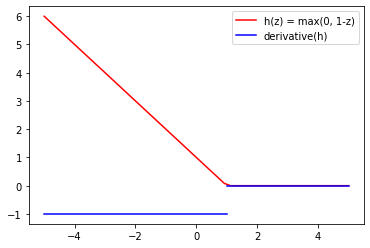

In [9]:
def h(z):
    return np.maximum(0, 1-z)

x_axis = np.linspace(-5, 5)

plt.plot(x_axis, h(x_axis), color='red', label = "h(z) = max(0, 1-z)")

plt.plot([-5, 1], [-1, -1], color="blue", label = "derivative(h)")
plt.plot([1,5], [0, 0], color="blue")

plt.legend()



plt.show()

We notice that h is derivative for all z except z=1. 

For $z!=1$, we have $\delta h(z) = \frac{\delta h}{\delta z}.$

For $z=1$, we notice that all the slopes between -1 and 0 suit.

Thus, we conlcude that : 

$$
\\ \delta h(z) = \left\{
    \begin{array}{ll}
        -1 &\mbox{if} & z < 1 \\
        [-1, 0] &\mbox{if} &z = 1 \\
        0 &\mbox{if} &z>1 
    \end{array}
\right.
$$




### Question 2.3

Let's set : $$
f(v,a) = \frac{1}{2}  \sum_{j = 1}^{m} v_{j}^{2} + c\sum_{j = 1}^{n} \max(0, 1 - y_{i}(x_{i}^{T}v + a))
$$

We can write this function as a composition of a linear application M and two separable functions $N$ and $H$ such that : 

$$
f(v,a) = N(v,a) + cH(M(v,a))
$$

According to the definition of a separable function, we have that : 

$$
N(w) = \sum_{j = 1}^{m} N_{j}(w_j) \space \space where \space \space w=(v,a)\\
and \space \space N_j = \frac{1}{2} v_{j}^{2}.
$$

Therefore : $N:(v,a)\rightarrow \frac{1}{2}  \sum_{j = 1}^{m} v_{j}^{2}$.

Using the same reasoning, we get that : 

$
M = 
\begin{pmatrix}
y_1 &   &    \\
      &...&\\
    &    &  y_n
\end{pmatrix}
$ x 
$ \begin{pmatrix}
    X^{T},
\begin{pmatrix}
1\\
..\\
1
\end{pmatrix}
\end{pmatrix} $thereore we get : 
$
M(v,a)\rightarrow \begin{pmatrix} y_{0}(x_{0}^{T}v + a) & ... & y_{0}(x_{0}^{T}v + a) \end{pmatrix}
$

and $H:(x)\rightarrow \sum_{i = 1}^{n} h(x_i)$, with $h(m) = max(0, 1-m). $


Let's define $f : \mathbb{R}^{m}$ x $\mathbb{R} \rightarrow \mathbb{R}$ and $g : \mathbb{R}^{n} \rightarrow \mathbb{R}$.
M is a linear operator $\mathbb{R}^{m}$ x $\mathbb{R}$ x $\mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ 



The $\textbf{proposition 4.2}$ states that if f and g be two convex functions, and M a linear operator.:
$$
\delta f(x) + M^{T}\delta g(x) \subseteq \delta ( f + goM)(x)
$$


Because we have that $dom(g) = \mathbb{R}$, then according to the course, we can conclude that : 

$$
\delta f(v,a) = \delta(N(v,a)) + cM^{T}\delta M(v,a)
$$

Therefore :  

$$
\\delta(N(v,a)) = \sum_{j = 1}^{m} v_j = (v,0)
$$
$$
\\ \delta M(v,a) = \prod_{k=1}^n \delta h(M_i(v,a)) = \prod_{k=1}^n \delta h(y_i(x_i^{T}v + a))  
$$


### Question 2.4

In [21]:
c = 1
x = np.concatenate([X,np.ones((569,1))], axis=1) 
## addition of a column of ones on the first column of X

M = np.diag(Y) @ x
#the entry variable is a line vector whose first columns correspond to v, and the last one to a

def N(va):
    return 0.5 * np.sum(va[:-1]**2)

def Hm(va):
    return np.sum(h(M @ va))

def f(va):
    return N(va) + c*Hm(va)

In [31]:
def delta_N(va):
    return np.concatenate([va[:-1], [0]])

def delta_Hm(va):
    return np.dot(x.T, (np.dot(M,va)>=1)- 1)

def delta_f(va):
    return delta_N(va) + c * delta_Hm(va)

### Question 2.5 : Subgradient method

In [22]:
def sub_grad_method(va0, N):
    va_moy = np.zeros(va0.shape)
    gamma_sum = 0
    
    for i in range(N):
        gamma = 0.001/np.sqrt(i+1)
        gamma_sum += gamma
        va_moy += va0 * gamma
        
        va0 = va0 - gamma*delta_f(va0)
    
    return va_moy/gamma_sum

In [25]:
va0 = np.zeros((31,))
print(f(va0))
va_1 = sub_grad_method(va0, 100000)
print(f(va_1))

569.0
28.087767544895126


## Part III -  Stochastic gradient method

Let $f_i(v,a) = \frac{1}{2} \sum_{j = 1}^{m} v_j^{2} + cn max(0, 1 - y_i(x_i^{T}v + a))$

### Question 3.1

$I$ is a random variable that follows a uniform law on {1,...,n}.

We have that : 
$$
\mathbb{E}[f_{I}(v,a)] = \mathbb{E}[\frac{1}{2} \sum_{i = 1}^{m} v_j^{2}] + cn\mathbb{E}[\sum_{i = 1}^{n} max(0, 1 - y_i(x_i^{T}v + a))] 
\\ = \frac{1}{2} \sum_{i = 1}^{m} v_j^{2} + cn\frac{1}{n}\sum_{i = 1}^{n} \mathbb{E}[max(0, 1 - y_i(x_i^{T}v + a)]
$$
Because the random variable is $I$, and $v$ and $a$ are fixed, we can conclude that : 
$$
\mathbb{E}[f_{I}(v,a)] = \frac{1}{2} \sum_{i = 1}^{m} v_j^{2} + c\sum_{i = 1}^{n} max(0, 1 - y_i(x_i^{T}v + a)
\\ = f(v,a)
$$


### Question 3.2

The function $f_{i}(v,a) = N(v,a) + cn$  x  $ h(M_i(v,a))$, where 
$M_i = y_i 
\begin{pmatrix}
x_i^{T} & 1
\end{pmatrix}
$

Therefore, the subdifferential of the function is : 
$
\delta f_{i}(v,a) = \delta N(v,0) + cn$  x  $ M_i^{T}\delta h(M_i(v,a))
$

### Question 3.3 : Stochastic gradient descent

In [26]:
import random

In [40]:
c=1

def I_var():
    return random.randint(0,n)

def N(va):
    sum = 0
    for i in range(n-1):
        sum+= va[i]
    return sum/2        

def M(i):
    y_i = np.diag(Y)[i][i] #get the value of yi
    x_i = X[:,i] #get the i-th column
    X_i = np.concatenate([x_i,np.ones((569,1))], axis=1)
    return y_i @ X_i.T 

def delta_fi(va, i):
    m = M(i)
    delta = N(va) + c*n*m.T*h(M(i))
    
    
def stoch_grad_method(va0, N):
    n = x.shape[0]
    va_moy = np.zeros(va0.shape)
    gamma_sum = 0
    
    for i in range(N):
        I = np.random.randint(n)
        gamma = 0.001/np.sqrt(i+1)
        gamma_sum += gamma
        va_moy += va0 * gamma
        
        va0 = va0 - gamma * delta_fi(va0,I)
    
    return va_moy/gamma_sum